## PS 3 Misc Notebook: Is turnout higher in swing states?

Lets explore one implication of the Riker and Ordeshook turnout model with some real data from the 2016 election.

The model predicts that voters will be more likely to turn out if 

p*b > c

where p is the probability of their vote being pivotal, b is the relative benefit of the preferred candidate, and c is the cost of voting.

Even if p is generally very small, the model still predicts that voters will be more apt to turn out when p is higher.

And, as we discussed in the week 3 lectures, in US presidential elections the probability of being pivotal is higher in "swing states".

Let's see what this relationship looks like with 2016 data.

To measure turnout, we will look at the total number of votes divided by the number of eligible voters in the state. Data from <a href="https://docs.google.com/spreadsheets/d/1VAcF0eJ06y_8T4o2gvIL4YcyQy8pxb1zYkgXF76Uu1s/edit#gid=2030096602"> here</a>.

We won't do any complicated calculations for the probability of being pivotal, but to get a sense of how close the election was in a state we will look at the "Trump two-way vote share", or Trump's votes divided by Trump plus Clinton (this is intended to remove the effect of smaller candidates). Data from <a href="https://www.fec.gov/documents/1890/federalelections2016.xlsx">here</a>.

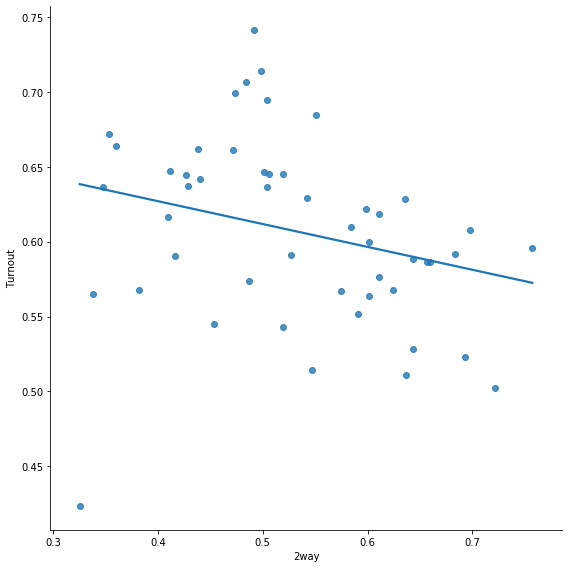

In [2]:
# Importing some libraries to make plots
import seaborn as sns
import pandas as pd
# Loading in the data
turnout = pd.read_csv('2016turnout.csv')
# Making a plot, with a "best fit line"
sns.lmplot('2way', 'Turnout', data=turnout, height=8, ci=0)

This first graph plots a "best fit line" which can tell is if turnout is relatively low or high in states where Trump got a higher vote share. There is a slight negative trend: the states with the lowest Trump vote share (about 30%) have generally have about 65% turnout), and those with the highest trump vote share (around 70%) have turnout around 60%.

However, this is not really the right test: what we want to know is whether turnout is higher in "closer" states.

One way to get at this is to define a new variable which measure the margin of victory, which we will define as the absolute value of the difference between the vote share and .5. So, when this is equal to 0 the state is effectively tied. When it is large, that means that either Trump or Clinton won the state by a lot.

In [3]:
turnout.insert(1, "Margin", abs(turnout['2way']-.5) )

Now lets look at the relationship between the margin and turnout

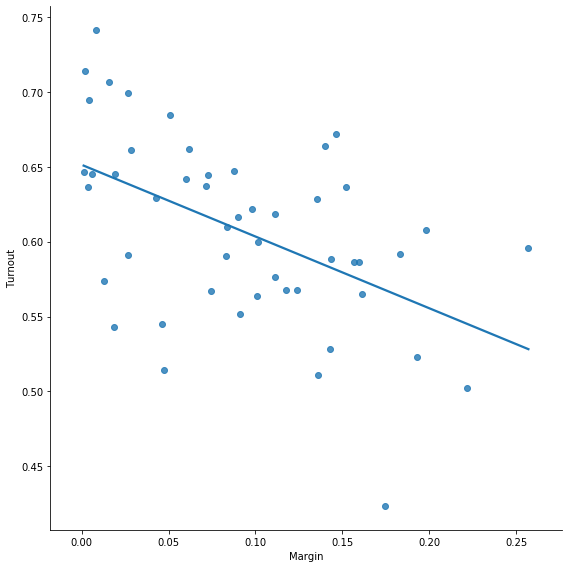

In [4]:
sns.lmplot('Margin', 'Turnout', data=turnout, height=8, ci=0)

Now we have a more clear negative relationship. In particular, as the pb>c predicts, turnout is higher in more competitive states! I'd say the magnitude of this relationship is moderate: in the most competitive states turnout is around 65%, and in the least competitive states it drops to about 55%. That's a real difference, but remember the difference of a vote being pivotal goes down by 100 or 1000 times as the state gets less competitive. So, there are probably lots of other factors which influence state-level (and individual-level) turnout.

Another way to do this is to return to our two way vote share variable but look for a best fit "curve", first with a quadratic function.

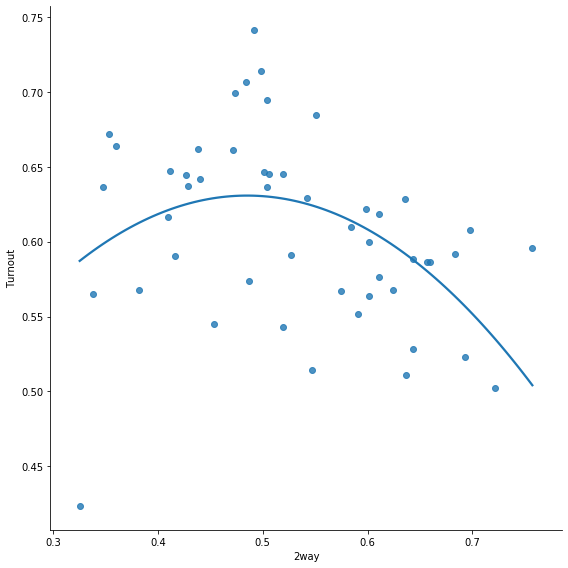

In [5]:
sns.lmplot('2way', 'Turnout', data=turnout, height=8, order=2, ci=0)

The curve here is fitting the "best parabola" through the data". Note that the maximum turnout happens almost exactly at a 50% two way turnout; i.e., the most competitive states!

We can also do this with a fancier technique called "local regression" which draws a more flexible curve.

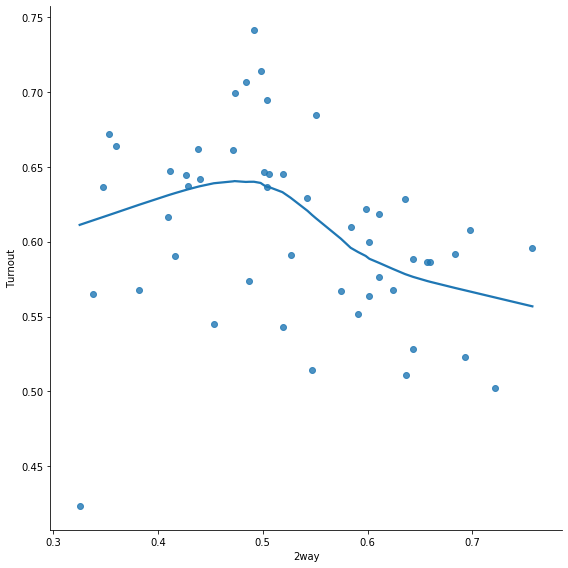

In [6]:
sns.lmplot('2way', 'Turnout', data=turnout, ci=None, height=8, lowess=1)

This also seems to be maxmimized at 50% Trump vote share.